In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('12. Seaborn_Batsman.csv')
df

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008
...,...,...,...,...,...,...,...
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018


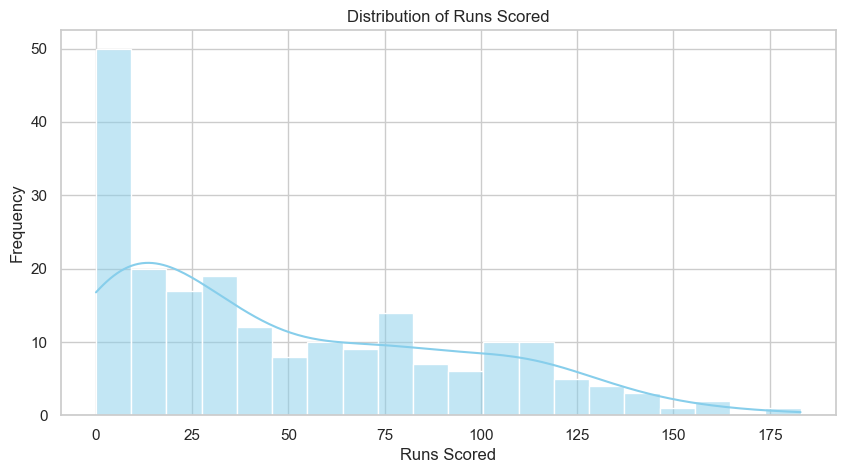

In [3]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Runs Scored Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['RunsScored'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Runs Scored")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()


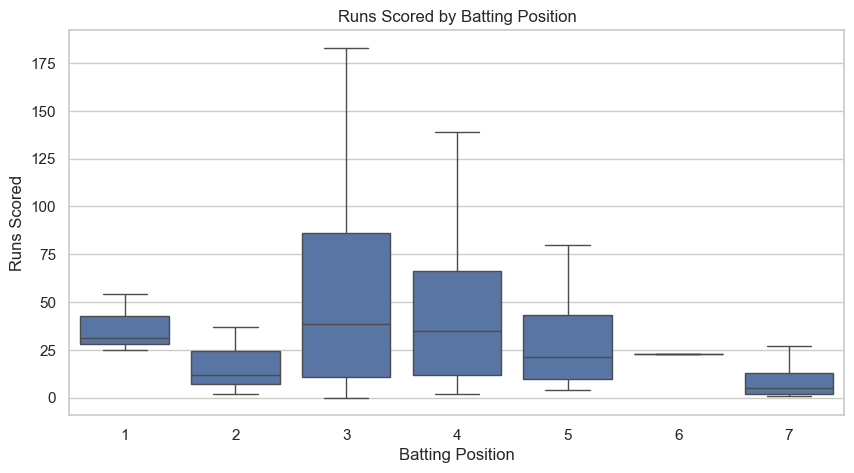

In [4]:

# Plot 2: Boxplot of RunsScored by BattingPosition
plt.figure(figsize=(10, 5))
sns.boxplot(x='BattingPosition', y='RunsScored', data=df)
plt.title("Runs Scored by Batting Position")
plt.xlabel("Batting Position")
plt.ylabel("Runs Scored")
plt.show()

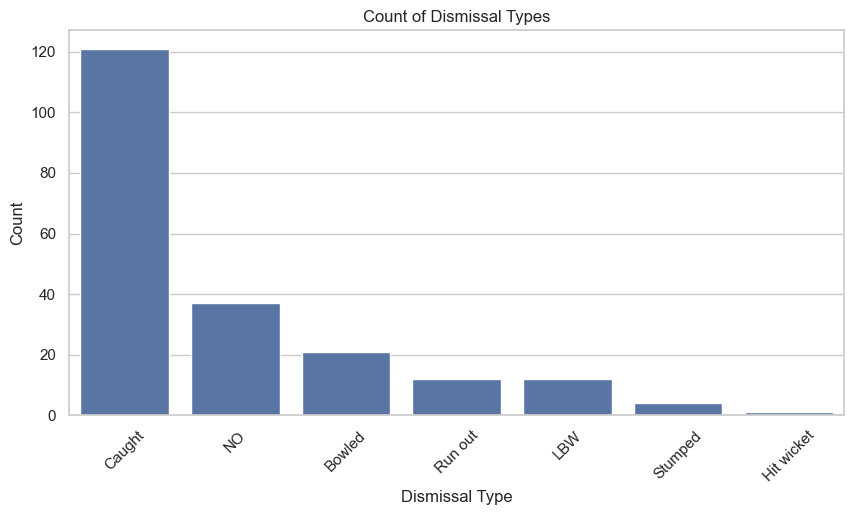

In [5]:
# Plot 3: Dismissal count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Dismissal', order=df['Dismissal'].value_counts().index)
plt.title("Count of Dismissal Types")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

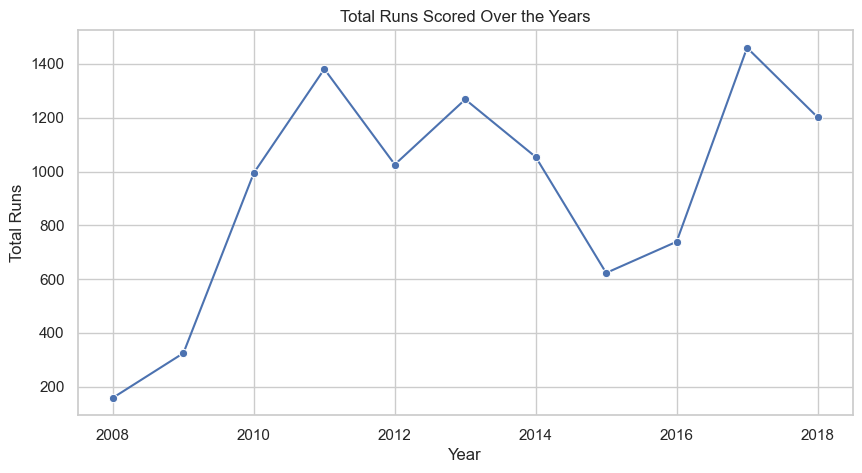

In [6]:
# Plot 4: Runs scored over the years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby('Year')['RunsScored'].sum().reset_index(), x='Year', y='RunsScored', marker="o")
plt.title("Total Runs Scored Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.show()


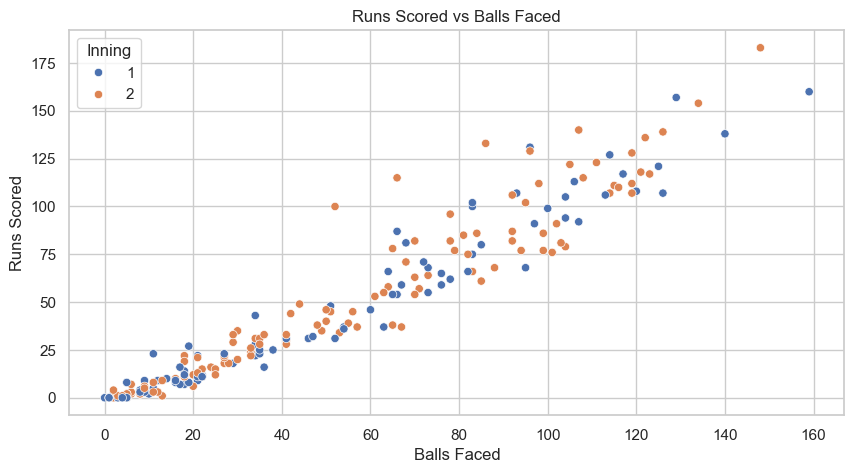

In [7]:
# Plot 5: RunsScored vs BallsFaced
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='BallsFaced', y='RunsScored', hue='Inning', palette="deep")
plt.title("Runs Scored vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.legend(title="Inning")
plt.show()

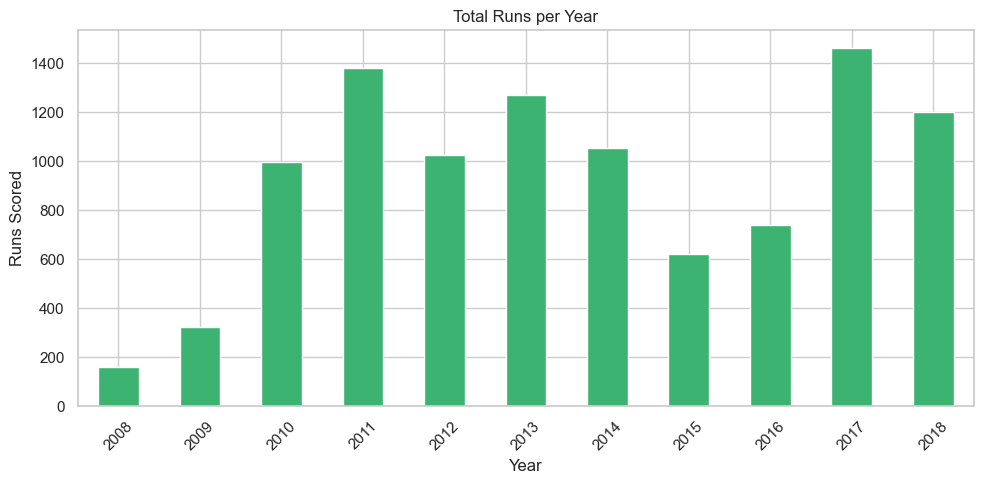

In [8]:
runs_per_year = df.groupby('Year')['RunsScored'].sum()

plt.figure(figsize=(10, 5))
runs_per_year.plot(kind='bar', color='mediumseagreen')
plt.title('Total Runs per Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

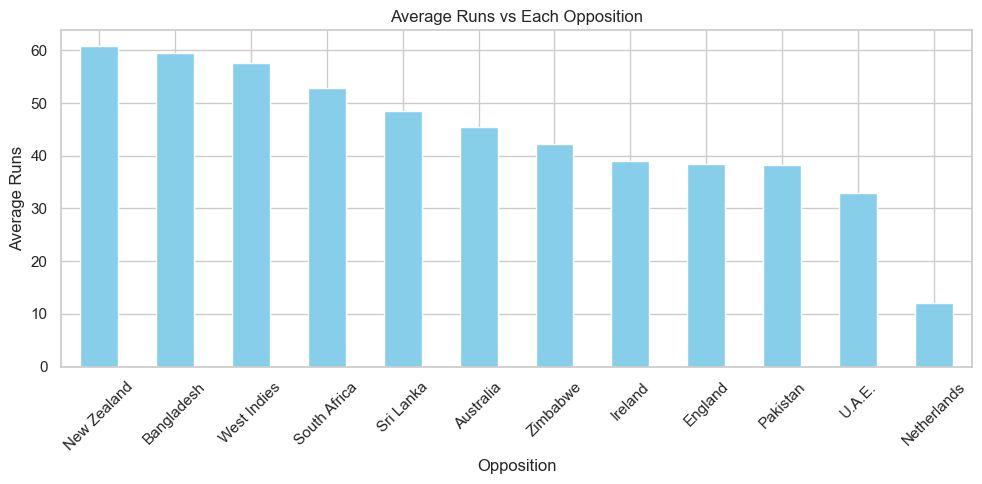

In [9]:
# Average runs against each opposition
avg_runs_opp = df.groupby('Opposition')['RunsScored'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_runs_opp.plot(kind='bar', color='skyblue')
plt.title('Average Runs vs Each Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

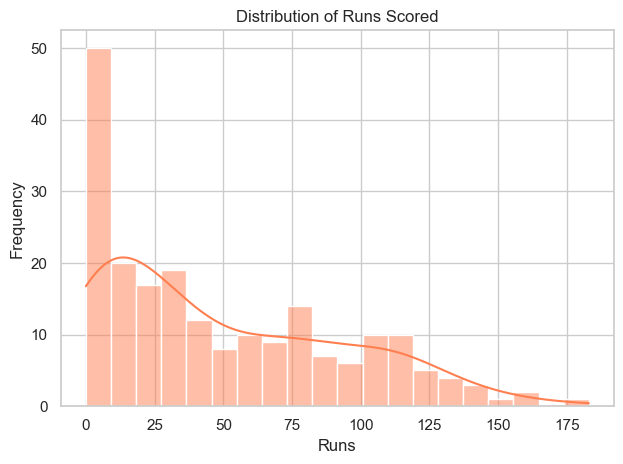

In [10]:
# Distribution of the runs
sns.histplot(df['RunsScored'], bins=20, kde=True, color='coral')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

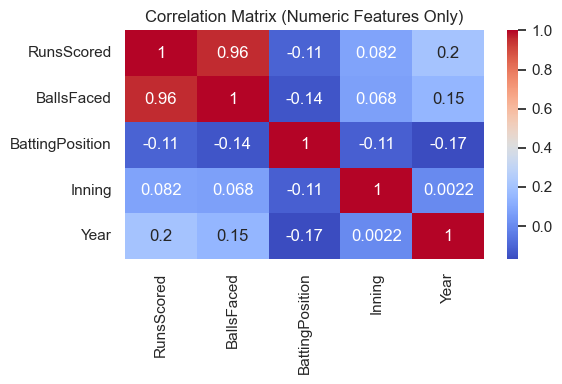

In [11]:
# Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.tight_layout()
plt.show()

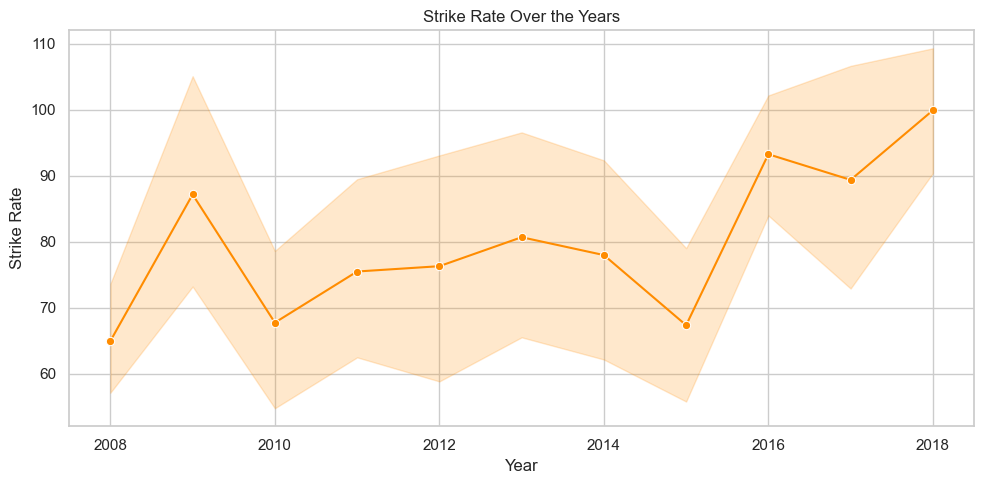

In [12]:
# Strike rate over time
df['StrikeRate'] = (df['RunsScored'] / df['BallsFaced']) * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='StrikeRate', data=df, marker='o', color='darkorange')
plt.title('Strike Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Strike Rate')
plt.tight_layout()
plt.show()

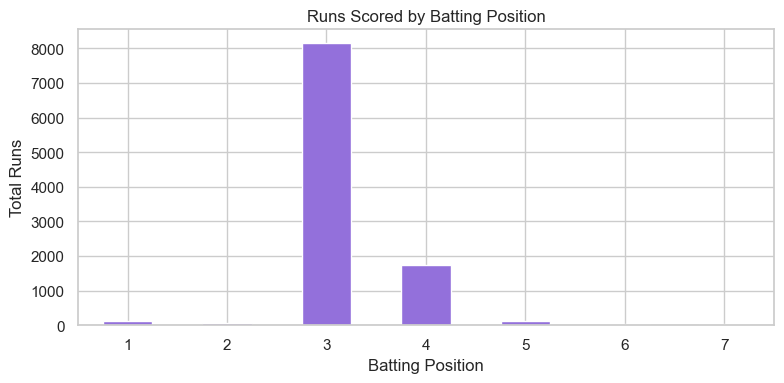

In [13]:
runs_by_position = df.groupby('BattingPosition')['RunsScored'].sum()

plt.figure(figsize=(8, 4))
runs_by_position.plot(kind='bar', color='mediumpurple')
plt.title('Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.tight_layout()

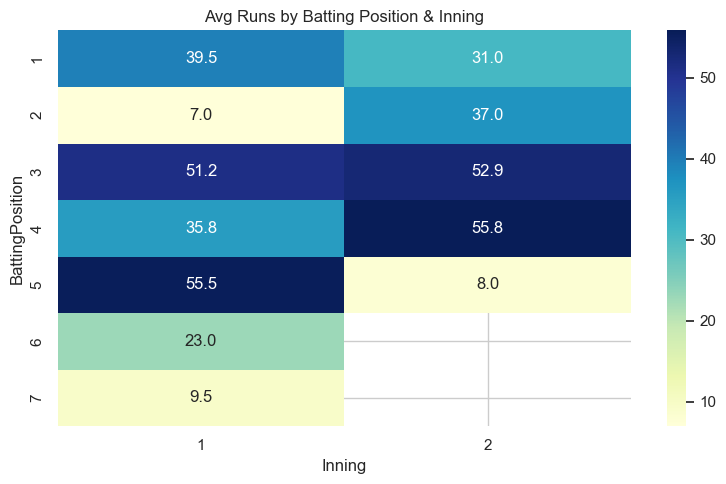

In [14]:
# Heatmap: Batting Position vs Inning (Average Runs)
heatmap_data = df.pivot_table(index='BattingPosition', columns='Inning', values='RunsScored', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Avg Runs by Batting Position & Inning')
plt.tight_layout()
plt.show()